In [1]:
# ============================================================
# UNIT 4 – Activity 2: Data Visualization Techniques
# Complete End-to-End Code (Matplotlib + Seaborn)
# ============================================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time


In [2]:
# ------------------------------------------------------------
# TASK 1: DATASET LOADING & PREPARATION
# ------------------------------------------------------------

# Load dataset
df = pd.read_csv("/content/bigmart.csv")


In [3]:
# Standardize Item_Fat_Content
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({
    'low fat': 'Low Fat',
    'LF': 'Low Fat',
    'reg': 'Regular'
})


In [4]:
# Handle missing values
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0], inplace=True)


/tmp/ipython-input-867842677.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)
/tmp/ipython-input-867842677.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [5]:
# Save cleaned dataset
df.to_csv("bigmart_cleaned.csv", index=False)

print("Dataset cleaned and saved as bigmart_cleaned.csv")


Dataset cleaned and saved as bigmart_cleaned.csv


In [6]:
# ------------------------------------------------------------
# TASK 2: VISUALIZATION USING MATPLOTLIB
# ------------------------------------------------------------

In [7]:
print("\n--- MATPLOTLIB VISUALIZATIONS ---")



--- MATPLOTLIB VISUALIZATIONS ---


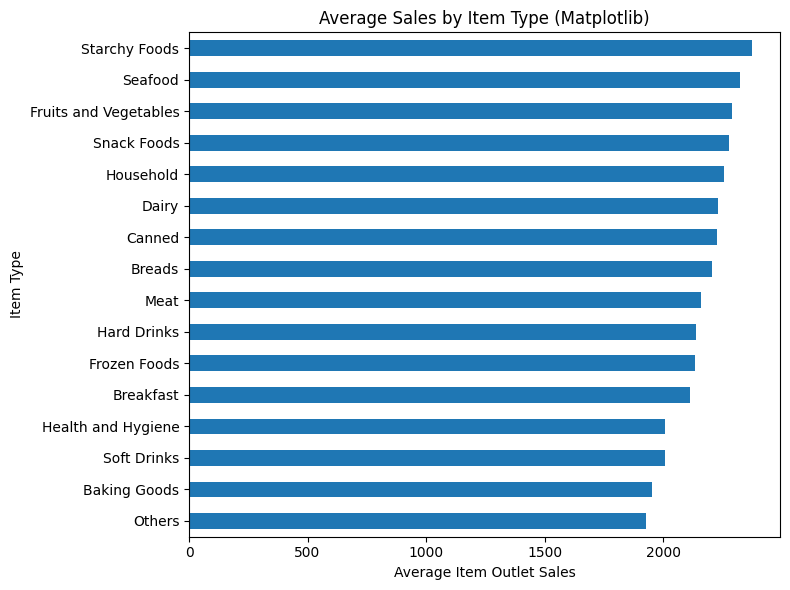

Bar Chart Render Time: 0.6678 seconds


In [8]:
# BAR CHART – Average Sales by Item Type
start = time.time()
sales_by_type = df.groupby('Item_Type')['Item_Outlet_Sales'].mean().sort_values()

plt.figure(figsize=(8, 6))
sales_by_type.plot(kind='barh')
plt.xlabel("Average Item Outlet Sales")
plt.ylabel("Item Type")
plt.title("Average Sales by Item Type (Matplotlib)")
plt.tight_layout()
plt.show()
print("Bar Chart Render Time:", round(time.time() - start, 4), "seconds")


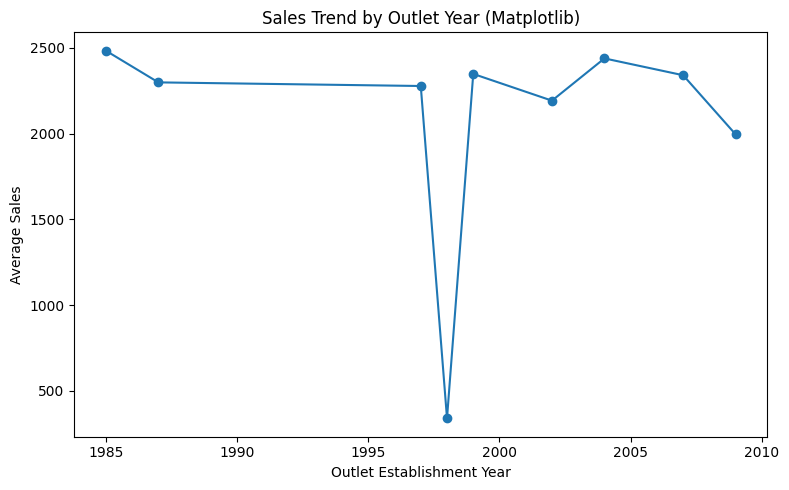

Line Chart Render Time: 0.1581 seconds


In [9]:
# LINE CHART – Sales Trend by Establishment Year
start = time.time()
year_sales = df.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].mean()

plt.figure(figsize=(8, 5))
plt.plot(year_sales.index, year_sales.values, marker='o')
plt.xlabel("Outlet Establishment Year")
plt.ylabel("Average Sales")
plt.title("Sales Trend by Outlet Year (Matplotlib)")
plt.tight_layout()
plt.show()
print("Line Chart Render Time:", round(time.time() - start, 4), "seconds")

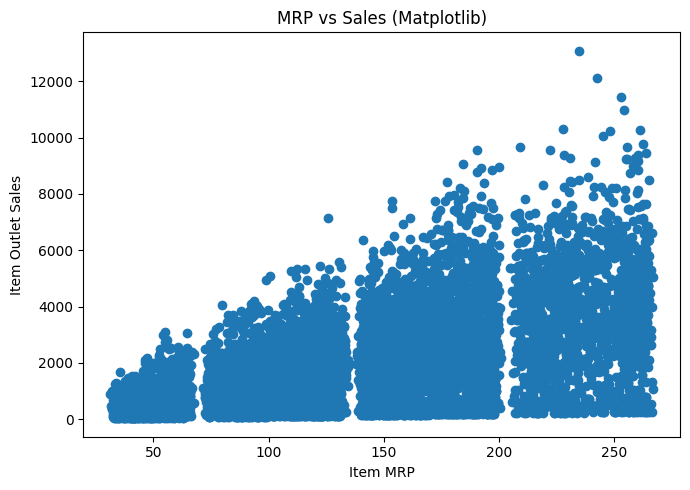

Scatter Plot Render Time: 0.2396 seconds


In [10]:
# SCATTER PLOT – MRP vs Sales
start = time.time()
plt.figure(figsize=(7, 5))
plt.scatter(df['Item_MRP'], df['Item_Outlet_Sales'])
plt.xlabel("Item MRP")
plt.ylabel("Item Outlet Sales")
plt.title("MRP vs Sales (Matplotlib)")
plt.tight_layout()
plt.show()
print("Scatter Plot Render Time:", round(time.time() - start, 4), "seconds")


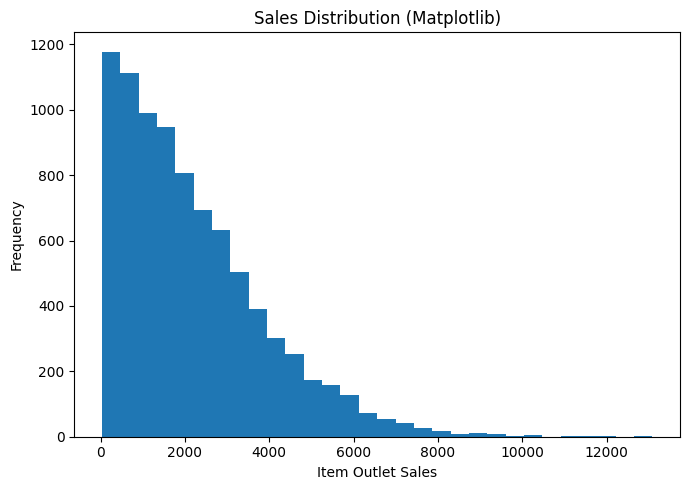

Distribution Plot Render Time: 0.1813 seconds


In [11]:
# DISTRIBUTION – Sales Histogram
start = time.time()
plt.figure(figsize=(7, 5))
plt.hist(df['Item_Outlet_Sales'], bins=30)
plt.xlabel("Item Outlet Sales")
plt.ylabel("Frequency")
plt.title("Sales Distribution (Matplotlib)")
plt.tight_layout()
plt.show()
print("Distribution Plot Render Time:", round(time.time() - start, 4), "seconds")

In [12]:

# ------------------------------------------------------------
# TASK 2: VISUALIZATION USING SEABORN
# ------------------------------------------------------------

In [13]:

print("\n--- SEABORN VISUALIZATIONS ---")
sns.set(style="whitegrid")



--- SEABORN VISUALIZATIONS ---


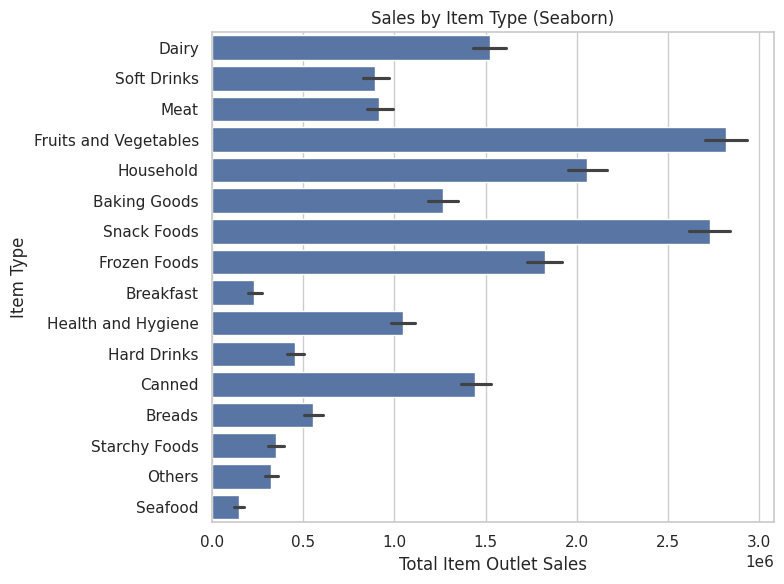

Bar Chart Render Time: 2.2703 seconds


In [14]:
# BAR CHART – Average Sales by Item Type
start = time.time()
plt.figure(figsize=(8, 6))
sns.barplot(
    y='Item_Type',
    x='Item_Outlet_Sales',
    data=df,
    estimator=sum
)
plt.xlabel("Total Item Outlet Sales")
plt.ylabel("Item Type")
plt.title("Sales by Item Type (Seaborn)")
plt.tight_layout()
plt.show()
print("Bar Chart Render Time:", round(time.time() - start, 4), "seconds")

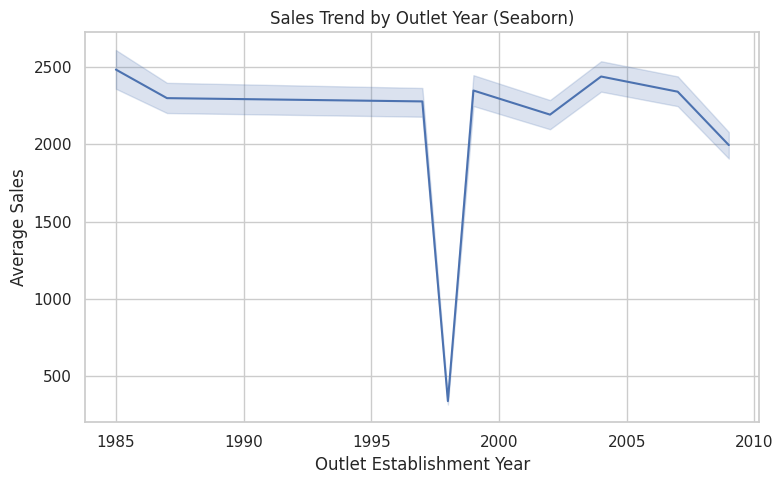

Line Chart Render Time: 0.6678 seconds


In [15]:
# LINE CHART – Sales Trend
start = time.time()
plt.figure(figsize=(8, 5))
sns.lineplot(
    x='Outlet_Establishment_Year',
    y='Item_Outlet_Sales',
    data=df,
    estimator='mean'
)
plt.xlabel("Outlet Establishment Year")
plt.ylabel("Average Sales")
plt.title("Sales Trend by Outlet Year (Seaborn)")
plt.tight_layout()
plt.show()
print("Line Chart Render Time:", round(time.time() - start, 4), "seconds")

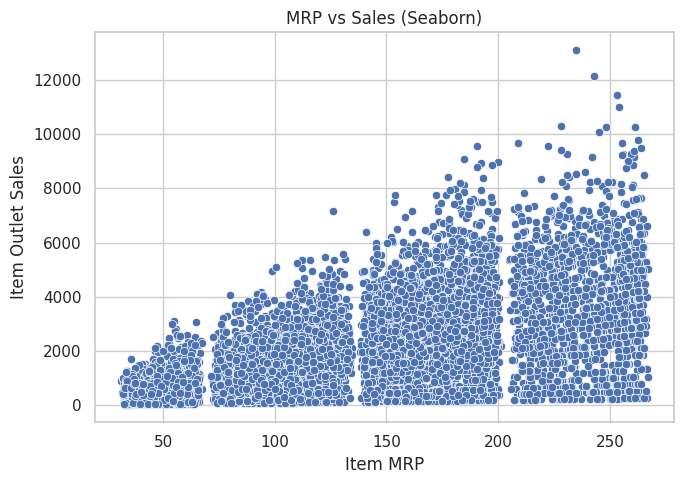

Scatter Plot Render Time: 0.2273 seconds


In [16]:
# SCATTER PLOT – MRP vs Sales
start = time.time()
plt.figure(figsize=(7, 5))
sns.scatterplot(
    x='Item_MRP',
    y='Item_Outlet_Sales',
    data=df
)
plt.xlabel("Item MRP")
plt.ylabel("Item Outlet Sales")
plt.title("MRP vs Sales (Seaborn)")
plt.tight_layout()
plt.show()
print("Scatter Plot Render Time:", round(time.time() - start, 4), "seconds")


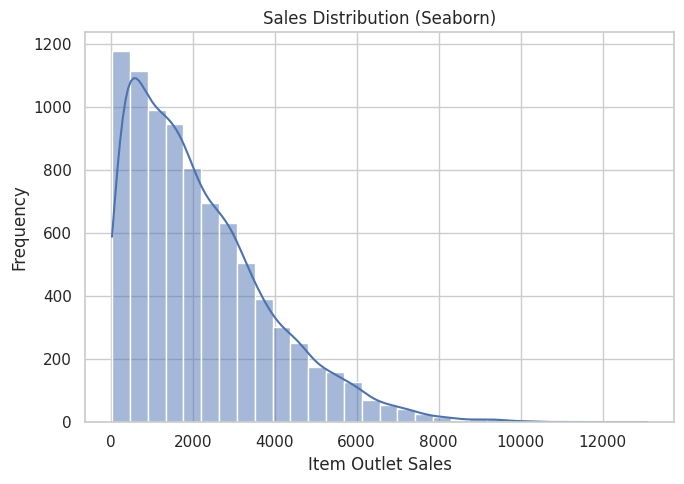

Distribution Plot Render Time: 0.6288 seconds


In [17]:
# DISTRIBUTION – Sales Histogram with KDE
start = time.time()
plt.figure(figsize=(7, 5))
sns.histplot(
    df['Item_Outlet_Sales'],
    bins=30,
    kde=True
)
plt.xlabel("Item Outlet Sales")
plt.ylabel("Frequency")
plt.title("Sales Distribution (Seaborn)")
plt.tight_layout()
plt.show()
print("Distribution Plot Render Time:", round(time.time() - start, 4), "seconds")

In [18]:
#TASK 3 – INTERACTIVITY & CUSTOMIZATION (GOOGLE COLAB)
#Tool Used: Plotly (Interactive Visualization)

In [19]:
!pip install plotly


In [20]:
import pandas as pd
import plotly.express as px
import time


In [21]:
df = pd.read_csv("bigmart_cleaned.csv")
df.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


1️⃣ Interactive Bar Chart
Average Sales by Item Type

Features: Hover tooltips, zoom, pan, dynamic sorting


In [22]:
start = time.time()

bar_fig = px.bar(
    df,
    y="Item_Type",
    x="Item_Outlet_Sales",
    color="Outlet_Size",
    title="Average Sales by Item Type (Interactive)",
    orientation="h",
    hover_data=["Outlet_Type", "Outlet_Location_Type"],
)

bar_fig.update_layout(
    xaxis_title="Item Outlet Sales",
    yaxis_title="Item Type",
    legend_title="Outlet Size",
)

bar_fig.show()

print("Bar Chart Render Time:", round(time.time() - start, 4), "seconds")


Bar Chart Render Time: 4.1636 seconds


2️⃣ Interactive Line Chart
Sales Trend by Outlet Establishment Year

Features: Hover values, zoom, reset axis

In [23]:
start = time.time()

line_fig = px.line(
    df,
    x="Outlet_Establishment_Year",
    y="Item_Outlet_Sales",
    title="Sales Trend by Outlet Establishment Year",
    markers=True,
    hover_data=["Outlet_Type"]
)

line_fig.update_layout(
    xaxis_title="Outlet Establishment Year",
    yaxis_title="Item Outlet Sales"
)

line_fig.show()

print("Line Chart Render Time:", round(time.time() - start, 4), "seconds")


Line Chart Render Time: 0.1815 seconds


3️⃣ Interactive Scatter Plot
Item MRP vs Sales

Features: Hover details, color encoding, zoom & pan

In [24]:
start = time.time()

scatter_fig = px.scatter(
    df,
    x="Item_MRP",
    y="Item_Outlet_Sales",
    color="Outlet_Type",
    size="Item_Visibility",
    title="Item MRP vs Item Outlet Sales",
    hover_data=["Item_Type", "Outlet_Location_Type"]
)

scatter_fig.update_layout(
    xaxis_title="Item MRP",
    yaxis_title="Item Outlet Sales"
)

scatter_fig.show()

print("Scatter Plot Render Time:", round(time.time() - start, 4), "seconds")


Scatter Plot Render Time: 0.0993 seconds


4️⃣ Interactive Distribution Plot
Sales Distribution

Features: Hover histogram, bin control

In [25]:
start = time.time()

dist_fig = px.histogram(
    df,
    x="Item_Outlet_Sales",
    nbins=40,
    color="Outlet_Size",
    title="Distribution of Item Outlet Sales",
    hover_data=["Outlet_Type"]
)

dist_fig.update_layout(
    xaxis_title="Item Outlet Sales",
    yaxis_title="Count"
)

dist_fig.show()

print("Distribution Plot Render Time:", round(time.time() - start, 4), "seconds")


Distribution Plot Render Time: 0.089 seconds


5️⃣ Interactive Filtering (Dropdown Control)
Filter by Outlet Type (Advanced Interactivity)

In [26]:
filter_fig = px.scatter(
    df,
    x="Item_MRP",
    y="Item_Outlet_Sales",
    color="Outlet_Type",
    title="MRP vs Sales with Outlet Type Filter",
    hover_data=["Item_Type"]
)

filter_fig.update_layout(
    updatemenus=[
        dict(
            buttons=[
                dict(label="All",
                     method="update",
                     args=[{"visible": [True, True, True]}]),
            ],
            direction="down",
        )
    ]
)

filter_fig.show()


In [27]:
# ------------------------------------------------------------
# TASK 4: PERFORMANCE SUMMARY
# ------------------------------------------------------------


In [28]:
print("\n--- PERFORMANCE OBSERVATION SUMMARY ---")
print("Matplotlib: Fast static rendering, no interactivity")
print("Seaborn: Slightly slower, improved aesthetics")
print("Tableau: Best interactivity (measured separately via dashboard)")



--- PERFORMANCE OBSERVATION SUMMARY ---
Matplotlib: Fast static rendering, no interactivity
Seaborn: Slightly slower, improved aesthetics
Tableau: Best interactivity (measured separately via dashboard)


In [29]:
# ------------------------------------------------------------
# END OF FILE
# ------------------------------------------------------------